In [1]:
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('Iris_data (1).xlsx')

In [3]:
df.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

NORMALIZING/ RESCALING THE DATA 

In [5]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [17]:
wcss = []

for i in range(2,12):
    kmeans = KMeans(n_clusters= i,n_init=12)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

PLOTTING THE RESULTS ONTO A LINE GRAPH, ALLOWING US TO OBSERVE 'THE ELBOW'

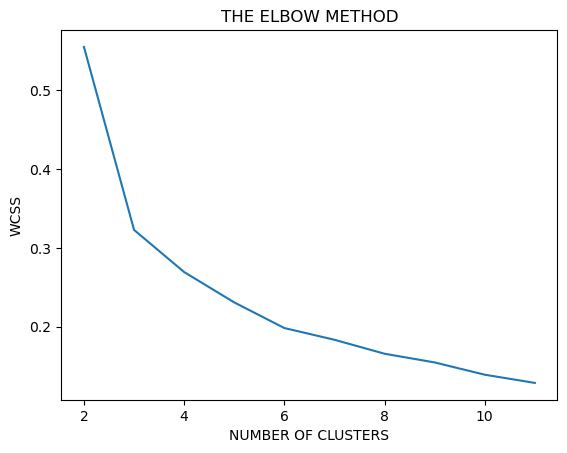

In [18]:
plt.plot(range(2,12),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS') # WITHIN CLUSTER SUM OF SQUARES
plt.show()

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
col_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
col_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

RENAMING THE RESPECTIVE COLUMNS FROM THE DATASET TO THE SCALLED DATA AND CREATING A DATAFRAME

In [10]:
data_scaled = pd.DataFrame(data_scaled,columns=col_names)
data_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


# APPLYING KMEANS TO THE DATASET/ CREATING THE KMEANS CLASSIFIER

In [11]:
kmeans = KMeans(n_clusters=3,n_init='auto')
y_kmeans = kmeans.fit_predict(data_scaled)

In [12]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

PLOTTING THE ABOVE PREDICTION

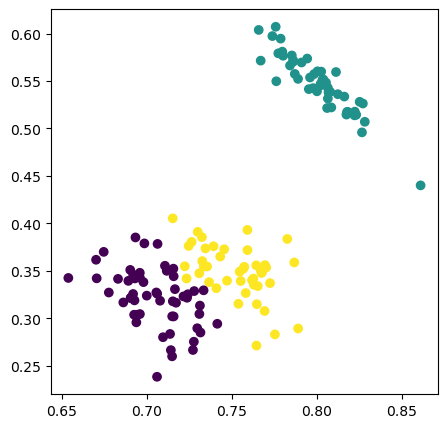

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(data_scaled['sepal length (cm)'],data_scaled['sepal width (cm)'],c = y_kmeans)